In [1]:

import sys
import os
current_dir = os.path.dirname(os.path.abspath('./'))
if not current_dir in sys.path:
    sys.path.append(current_dir)
from combiners import EpochsCombiner
from typing import *
import mne
import tensorflow as tf
import mneflow as mf
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(-2*np.pi, 2*np.pi, 100)

# plt.plot(x, tf.keras.activations.linear(x)) # very good
# plt.title('linear')
# plt.show()

# plt.plot(x, tf.nn.relu(x))
# plt.title('relu')
# plt.show()

# plt.plot(x, tf.nn.gelu(x))
# plt.title('gelu')
# plt.show()

# plt.plot(x, tf.nn.elu(x))
# plt.title('elu')
# plt.show()

# plt.plot(x, tf.nn.selu(x))
# plt.title('selu')
# plt.show()

# plt.plot(x, tf.nn.swish(x)) # good
# plt.title('swish')
# plt.show()

# plt.plot(x, tf.nn.softplus(x))
# plt.title('softpuls')
# plt.show()

# plt.plot(x, tf.nn.softsign(x))
# plt.title('sofsign')
# plt.show()

# plt.plot(x, tf.nn.sigmoid(x)) # good
# plt.title('sigmoid')
# plt.show()

# # plt.plot(x, tf.keras.activations.hard_sigmoid(x)) # good
# # plt.title('hard_sigmoid')
# # plt.show()

# plt.plot(x, tf.nn.tanh(x)) # good
# plt.title('tanh')
# plt.show()



2022-02-09 01:08:25.329618: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-09 01:08:25.329643: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
content_root = '../'
subjects_folder_path = os.path.join(content_root, 'Source/Subjects')
subject_path = os.path.join(subjects_folder_path, 'Az_Mar_05')
info_path = os.path.join(subject_path, 'Info',
                        'ML_Subject05_P1_tsss_mc_trans_info.pkl')
resp_lock_lm_B1_epochs_path = os.path.join(
    subject_path, 'Epochs', 'RespCor_LM_B1_epochs.fif')
resp_lock_rm_B1_epochs_path = os.path.join(
    subject_path, 'Epochs', 'RespCor_RM_B1_epochs.fif')
resp_lock_li_B1_epochs_path = os.path.join(
    subject_path, 'Epochs', 'RespCor_LI_B1_epochs.fif')
resp_lock_ri_B1_epochs_path = os.path.join(
    subject_path, 'Epochs', 'RespCor_RI_B1_epochs.fif')
resp_lock_lm_B1_epochs = mne.read_epochs(resp_lock_lm_B1_epochs_path)
resp_lock_li_B1_epochs = mne.read_epochs(resp_lock_li_B1_epochs_path)
resp_lock_rm_B1_epochs = mne.read_epochs(resp_lock_rm_B1_epochs_path)
resp_lock_ri_B1_epochs = mne.read_epochs(resp_lock_ri_B1_epochs_path)

Reading ../Source/Subjects/Az_Mar_05/Epochs/RespCor_LM_B1_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Az_Mar_05/Epochs/RespCor_LI_B1_epochs.fif ...


/tmp/ipykernel_2079862/432344939.py:14: RuntimeWarning: This filename (../Source/Subjects/Az_Mar_05/Epochs/RespCor_LM_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  resp_lock_lm_B1_epochs = mne.read_epochs(resp_lock_lm_B1_epochs_path)
/tmp/ipykernel_2079862/432344939.py:15: RuntimeWarning: This filename (../Source/Subjects/Az_Mar_05/Epochs/RespCor_LI_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  resp_lock_li_B1_epochs = mne.read_epochs(resp_lock_li_B1_epochs_path)


    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
27 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Az_Mar_05/Epochs/RespCor_RM_B1_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Reading ../Source/Subjects/Az_Mar_05/Epochs/RespCor_RI_B1_epochs.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
30 matching events found


/tmp/ipykernel_2079862/432344939.py:16: RuntimeWarning: This filename (../Source/Subjects/Az_Mar_05/Epochs/RespCor_RM_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  resp_lock_rm_B1_epochs = mne.read_epochs(resp_lock_rm_B1_epochs_path)
/tmp/ipykernel_2079862/432344939.py:17: RuntimeWarning: This filename (../Source/Subjects/Az_Mar_05/Epochs/RespCor_RI_B1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  resp_lock_ri_B1_epochs = mne.read_epochs(resp_lock_ri_B1_epochs_path)


No baseline correction applied
0 projection items activated


In [3]:
resp_lock_li_B1_epochs.resample(200)
resp_lock_lm_B1_epochs.resample(200)
resp_lock_ri_B1_epochs.resample(200)
resp_lock_rm_B1_epochs.resample(200)

Number of events,30
Events,0: 30
Time range,-0.500 – 0.495 sec
Baseline,off


In [4]:
combiner = EpochsCombiner(
    resp_lock_lm_B1_epochs.copy(),
    resp_lock_li_B1_epochs.copy(),
    resp_lock_rm_B1_epochs.copy(),
    resp_lock_ri_B1_epochs.copy()
)
first_class_indices = (0, 1)
second_class_indices = (2, 3)
combiner.combine(first_class_indices, second_class_indices, shuffle=True)
# combiner = EpochsCombiner(resp_lock_li_B1_epochs, resp_lock_lm_B1_epochs)
# combiner.combine(0, 1, shuffle=True)


from dataclasses import dataclass

# Specify import options
import_opt = dict(
    # path where TFR files will be saved
    savepath='../Source/Subjects/Az_Mar_05/TFR/left_vs_right/',
    out_name='mne_sample_epochs',  # name of TFRecords files
    fs=200,
    input_type='trials',
    target_type='int',
    picks={'meg': 'grad'},
    scale=True,  # apply baseline_scaling
    crop_baseline=True,  # remove baseline interval after scaling
    decimate=None,
    # indices in time axis corresponding to baseline interval
    scale_interval=(0, 60),
    n_folds=5,  # validation set size set to 20% of all data
    overwrite=True,
    segment=False,
    test_set='holdout'
)


In [13]:
# X = np.random.rand(5000, 204, 200)
# Y = np.array([np.heaviside(np.random.rand(5000) - .5, 0)])
meta['train_paths']

['../Source/Subjects/Az_Mar_05/TFR/left_vs_right/mne_sample_epochs_train_0.tfrecord']

In [11]:
# meta = mf.produce_tfrecords((combiner.X, combiner.Y), **import_opt)
meta = mf.produce_tfrecords((X, Y), **import_opt)

importing from tuple
input shapes: X- (5000, 204, 200) targets- (1, 5000)
Preprocessing:
Scaling to interval 0.0 - 60.0
Splitting sets
Preprocessed: (5000, 1, 200, 204) (5000, 2) folds: 6 x 833
Prepocessed sample shape: (1, 200, 204)
Target shape actual/metadata:  (2,) (2,)
Saving TFRecord# 0


In [12]:
# Ivan had 120 Hz
import mneflow as mf
dataset = mf.Dataset(meta, train_batch=100)

lf_params = dict(
    n_latent=32,  # number of latent factors ~ optimal
    # convolutional filter length in time samples ~ increase (its 17 amopng 1000)
    filter_length=25,
    nonlin=tf.keras.activations.elu,
    padding='SAME',
    pooling=10,  # pooling factor (5 - 10)
    stride=10,  # stride parameter for pooling layer
    pool_type='max',
    model_path=import_opt['savepath'],
    dropout=.2,
    l1_scope=["weights"],
    l1=1e-7  # decrease it
)

model = mf.models.LFCNN(dataset, lf_params)
model.build()

model.train(n_epochs=25, eval_step=100, early_stopping=25)
train_loss, train_acc = model.evaluate(meta['train_paths'])
test_loss, test_acc = model.evaluate(meta['test_paths'])

model.plot_hist()


print(f'train accuracy: {train_acc}\ntrain loss: {train_loss}\ntest accuracy: {test_acc}\ntest loss: {test_loss}')


from utils.data_management import dict2str
print(dict2str(meta))

2022-02-09 01:11:07.848254: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-09 01:11:07.848286: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-09 01:11:07.848306: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (arcolinux-machine): /proc/driver/nvidia/version does not exist
2022-02-09 01:11:07.852429: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Setting reg for dmx, to l1
Built: dmx input: (None, 1, 200, 204)
Setting reg for tconv, to l1
Built: tconv input: (None, 1, 200, 32)
Setting reg for fc, to l1
Built: fc input: (None, 1, 20, 32)
Input shape: (1, 200, 204)
y_pred: (None, 2)
Initialization complete!
Epoch 1/25
100/100 - 3s - loss: 0.7540 - cat_ACC: 0.5118 - val_loss: 0.7202 - val_cat_ACC: 0.4993 - 3s/epoch - 31ms/step
Epoch 2/25
100/100 - 2s - loss: 0.7060 - cat_ACC: 0.5515 - val_loss: 0.7186 - val_cat_ACC: 0.4806 - 2s/epoch - 25ms/step
Epoch 3/25
100/100 - 2s - loss: 0.6793 - cat_ACC: 0.5788 - val_loss: 0.7141 - val_cat_ACC: 0.5036 - 2s/epoch - 22ms/step
Epoch 4/25
100/100 - 2s - loss: 0.6572 - cat_ACC: 0.6156 - val_loss: 0.7141 - val_cat_ACC: 0.4906 - 2s/epoch - 22ms/step
Epoch 5/25
100/100 - 2s - loss: 0.6324 - cat_ACC: 0.6448 - val_loss: 0.7145 - val_cat_ACC: 0.5022 - 2s/epoch - 23ms/step
Epoch 6/25
100/100 - 2s - loss: 0.6130 - cat_ACC: 0.6645 - val_loss: 0.7188 - val_cat_ACC: 0.5022 - 2s/epoch - 23ms/step
Epoch 7/25

KeyboardInterrupt: 

In [8]:
print(
    meta['test_paths']
)
print(
    dict2str(model.dataset.__dict__)
)

print(model.__dict__.keys())
print(model.v_metric)
print(model.v_loss)

['../Source/Subjects/Az_Mar_05/TFR/left_vs_right/mne_sample_epochs_test_0.tfrecord']
  {
   h_params: {
     train_paths: ['../Source/Subjects/Az_Mar_05/TFR/left_vs_right/mne_sample_epochs_train_0.tfrecord'],
     val_paths: [],
     test_paths: ['../Source/Subjects/Az_Mar_05/TFR/left_vs_right/mne_sample_epochs_test_0.tfrecord'],
     folds: [[array([109,  66,  54,  38,  64,  83,  25,  82,  39, 114,  15,  55,   7,
        63,   5,  77,  95,  37,  96]), array([ 61,  11,  92,  56,  49,  16,  57,  91,  47,  46,  75,  36,   2,
        50,  81, 100,  73,  76, 110]), array([ 99, 111,  65,  10,  29,  13,  72,  60,  20,  58, 106,  80,  43,
        30,  93,  52,  78, 102,  51]), array([ 22,  86,  85, 103,  27,  33, 115,  89,  94,  12,  84, 101,  69,
        35,  28,  97, 108,   4,  23]), array([74, 41, 19, 98,  1, 32,  6, 21, 62, 14, 53, 31, 87, 44, 18, 88, 42,
       24, 71])]],
     test_fold: [array([ 59,  48,  40,   8,   3, 113,   9,  17,  67,  70,  26, 112, 116,
       107,  34,  90, 104, 

In [9]:
model.compute_patterns(output='filters')

Computing patterns: No path specified, using validation dataset (Default)


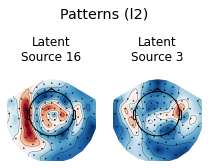

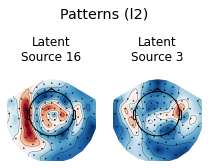

In [10]:
import copy

#b% Completely redone
def plot_patterns(self, info, sorting='l2', components=None, ch_type=None,
                vmin=None, vmax=None, cmap='RdBu_r', sensors=True,
                colorbar=False, units='a.u.', res=64,
                size=1, cbar_fmt='%3.1f', name_format='Latent\nSource %01d',
                show=True, show_names=False, title=None,
                outlines='head', contours=6,
                image_interp='bilinear', average=None,
                sphere=None):
    if not title:
        title=f'Patterns ({sorting})'
    order, ts = self._sorting(sorting)
    self.uorder = order.ravel()
    info = copy.deepcopy(info)
    info['sfreq'] = 1.
    patterns = mne.EvokedArray(self.patterns, info, tmin=0)
    return patterns.plot_topomap(
        times=self.uorder,
        cmap=cmap, colorbar=colorbar, res=res,
        cbar_fmt=cbar_fmt, sensors=sensors, units=None, time_unit='s',
        time_format=name_format, size=size, show_names=show_names,
        title=title, outlines=outlines,
        contours=contours, image_interp=image_interp, show=show, scalings=np.max(patterns.data[:, model.uorder]))


plot_patterns(model, resp_lock_li_B1_epochs.info, 'l2')

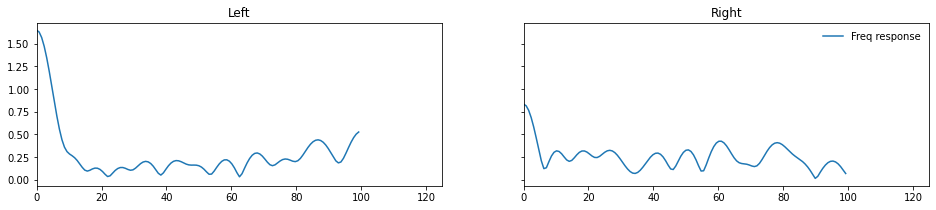

In [14]:
condition_names = ['Left', 'Right']
f2 = model.plot_spectra(sorting='weight_corr',
                        # norm_spectra='welch',
                        class_names=condition_names)
# f3 = model.plot_waveforms(sorting='compwise_loss', class_names=condition_names)


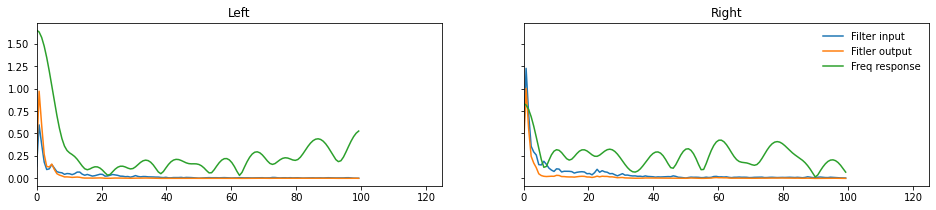

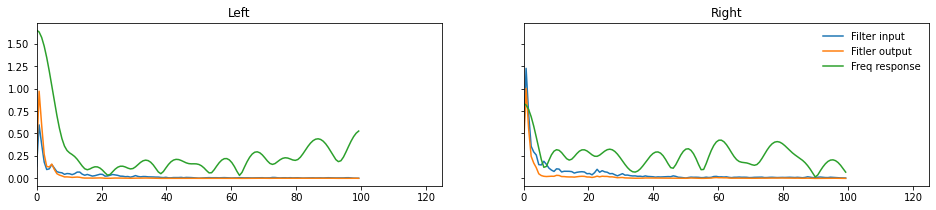

In [20]:
import scipy.signal as sl

def plot_spectra(model, fs=None, sorting='l2', norm_spectra=None,
                    log=False, class_names=None):

    if fs is not None:
        model.fs = fs
    elif model.dataset.h_params['fs']:
        model.fs = model.dataset.h_params['fs']
    else:
        print('Sampling frequency not specified, setting to 1.')
        model.fs = 1.

    if norm_spectra:
        if norm_spectra == 'welch':
            fr, psd = sl.welch(model.lat_tcs, fs=model.fs, nperseg=256)
            model.d_psds = psd[:, :-1]

    order, ts = model._sorting(sorting)
    model.uorder = order.ravel()
    out_filters = model.filters[:, model.uorder]
    l_u = len(model.uorder)

    nfilt = max(model.out_dim, 8)
    nrows = max(1, l_u//nfilt)
    ncols = min(nfilt, l_u)
    if np.any(model.uorder):
        f, ax = plt.subplots(nrows, ncols, sharey=True)
        f.set_size_inches([16, 3])
        ax = np.atleast_2d(ax)
        if sorting in ['output_corr', 'weight', 'weight_corr', 'compwise_loss']:
            if class_names:
                comp_names = class_names
            else:
                comp_names = ["Class " + str(jj) for jj in range(model.out_dim)]
            [ax[0][jj].set_title(c) for jj, c in enumerate(comp_names)]
        
        
        for i in range(nrows):
            for jj, flt in enumerate(out_filters[:, i*ncols:(i+1)*ncols].T):
                w, h = sl.freqz(flt, 1, worN=128)
                fr1 = w/np.pi*model.fs/2
                if  norm_spectra == 'welch':    
                    
                    h0 = model.d_psds[model.uorder[jj], :]*np.abs(h)
                    if log:
                        ax[i, jj].semilogy(fr1, model.d_psds[model.uorder[jj], :],
                                            label='Filter input')
                        ax[i, jj].semilogy(fr1, np.abs(h0),
                                            label='Fitler output')
                    else:
                        ax[i, jj].plot(fr1, model.d_psds[model.uorder[jj], :],
                                        label='Filter input')
                        ax[i, jj].plot(fr1, np.abs(h0), label='Fitler output')
                
                    if log:
                        ax[i, jj].semilogy(fr1, np.abs(h),
                                            label='Freq response')
                    else:
                        ax[i, jj].plot(fr1, np.abs(h),
                                        label='Freq response')
                ax[i, jj].set_xlim(0, 125.)
                ax[i, jj].set_xlim(0, 125.)
                if i == 0 and jj == ncols-1:
                    ax[i, jj].legend(frameon=False)
        return f
plot_spectra(model, sorting='weight_corr',
                        norm_spectra='welch',
                        class_names=condition_names)

In [28]:
model = mf.models.EEGNet(dataset, lf_params)
model.build()


Batchnorm: (None, 204, 1001, 32)
Pooling 1: (None, 1, 200, 64)
Batchnorm 2: (None, 1, 200, 64)
Pooling 2: (None, 1, 20, 64)
Built: fc input: (None, 1, 20, 64)
Input shape: (1, 1001, 204)
y_pred: (None, 2)
Initialization complete!


In [ ]:
model.train(n_epochs=25, eval_step=100, early_stopping=5)
model.plot_hist()


Epoch 1/25


2021-11-30 14:24:17.456727: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 810281472 exceeds 10% of free system memory.
2021-11-30 14:24:17.671678: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 810281472 exceeds 10% of free system memory.
2021-11-30 14:24:17.672136: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 810281472 exceeds 10% of free system memory.
2021-11-30 14:24:17.672774: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 810281472 exceeds 10% of free system memory.
2021-11-30 14:24:19.488984: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 810281472 exceeds 10% of free system memory.
